In [42]:
#%matplotlib widget
%load_ext autoreload
%autoreload 2
import sys
import pickle
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
plt.ioff()
csfont = { 'fontsize':30}
hfont = {'fontsize':30}
alpha = 0.15
results_dir = '../results/series'

## NRoom-v1

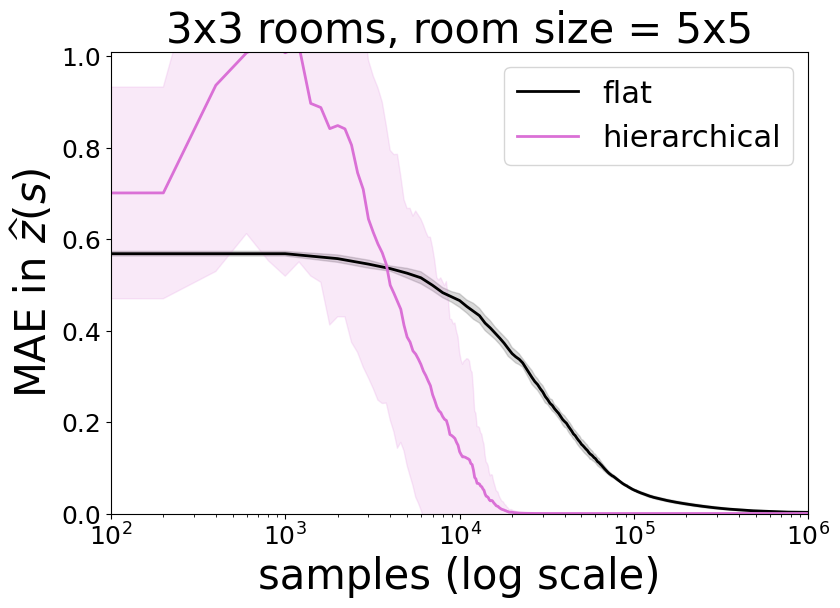

In [22]:
MAX_N_SAMPLES = int(1e6)
X_LIM = 25

# FLAT
df_flat = pd.read_csv(os.path.join(results_dir, "NRoom-v1-log-flat-train:MAE_z.csv"))
flat_mean = df_flat.iloc[:, 1:].mean(axis=1)
flat_std = df_flat.iloc[:, 1:].std(axis=1)
steps = df_flat.step

# FLAT
df_h = pd.read_csv(os.path.join(results_dir, "NRoom-v1-log-hierarchical-train:MAE_exit_states.csv"))
h_mean = df_h.iloc[:, 1:].mean(axis=1)
h_std = df_h.iloc[:, 1:].std(axis=1)
stepsh = df_h.step

fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.set_title(fr'3x3 rooms, room size = 5x5', **csfont)

# VERSION 1
ax.plot(steps, flat_mean, linewidth=2, color='black', label='flat')
ax.fill_between(steps, flat_mean-flat_std, flat_mean+flat_std, color='black', alpha=alpha)
# VERSION 2
ax.plot(stepsh, h_mean , linewidth=2, color='orchid', label='hierarchical')
ax.fill_between(stepsh, h_mean-h_std, h_mean+h_std, color='orchid', alpha=alpha)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

legend = ['$V_1$']

ax.legend(fontsize=22, loc=1)
ax.set_ylim((0, 1.01))
ax.set_xscale("log")
ax.set_xlim((1e2, 1e6))


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.xaxis.offsetText.set_fontsize(18)

ax.set_ylabel('MAE in $\widehat z(s)$', **hfont)
ax.set_xlabel('samples (log scale)', **hfont)

plt.savefig('../results/pictures/nrooms_3_3.pdf', bbox_inches='tight', dpi=500)
plt.show()

## NRoom-v2

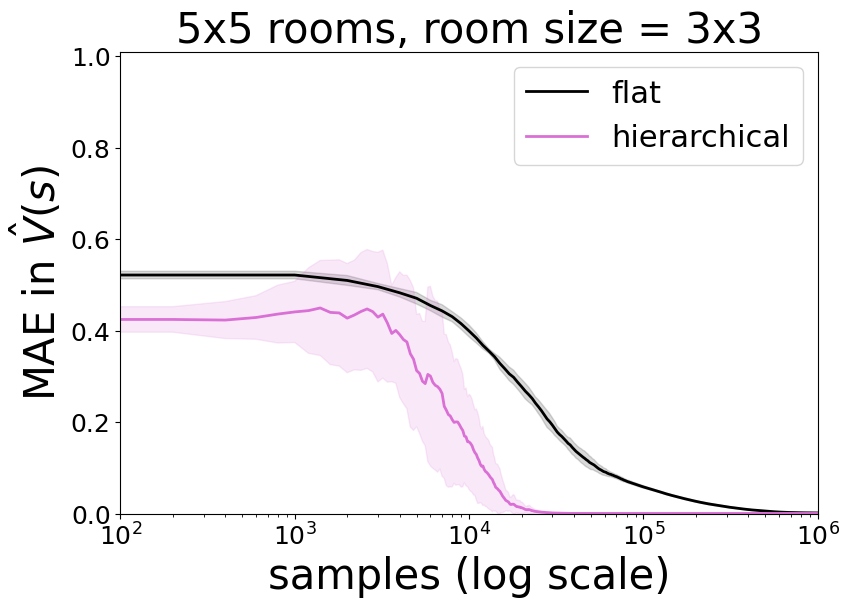

In [15]:
MAX_N_SAMPLES = int(1e6)
X_LIM = 25

# FLAT
df_flat = pd.read_csv(os.path.join(results_dir, "NRoom-v2-log-flat-train:MAE_z.csv"))
flat_mean = df_flat.iloc[:, 1:].mean(axis=1)
flat_std = df_flat.iloc[:, 1:].std(axis=1)
steps = df_flat.step

# FLAT
df_h = pd.read_csv(os.path.join(results_dir, "NRoom-v2-log-hierarchical-train:MAE_exit_states.csv"))
h_mean = df_h.iloc[:, 1:].mean(axis=1)
h_std = df_h.iloc[:, 1:].std(axis=1)
stepsh = df_h.step

fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.set_title(fr'5x5 rooms, room size = 3x3', **csfont)

# VERSION 1
ax.plot(steps, flat_mean, linewidth=2, color='black', label='flat')
ax.fill_between(steps, flat_mean-flat_std, flat_mean+flat_std, color='black', alpha=alpha)
# VERSION 2
ax.plot(stepsh, h_mean , linewidth=2, color='orchid', label='hierarchical')
ax.fill_between(stepsh, h_mean-h_std, h_mean+h_std, color='orchid', alpha=alpha)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

legend = ['$V_1$']

ax.legend(fontsize=22, loc=1)
ax.set_ylim((0, 1.01))
ax.set_xscale("log")
ax.set_xlim((1e2, 1e6))


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.xaxis.offsetText.set_fontsize(18)

ax.set_ylabel('MAE in $\hat V(s)$', **hfont)
ax.set_xlabel('samples (log scale)', **hfont)

plt.savefig('../results/pictures/nrooms_5_5.pdf', bbox_inches='tight', dpi=500)
plt.show()

## NRoom-v3

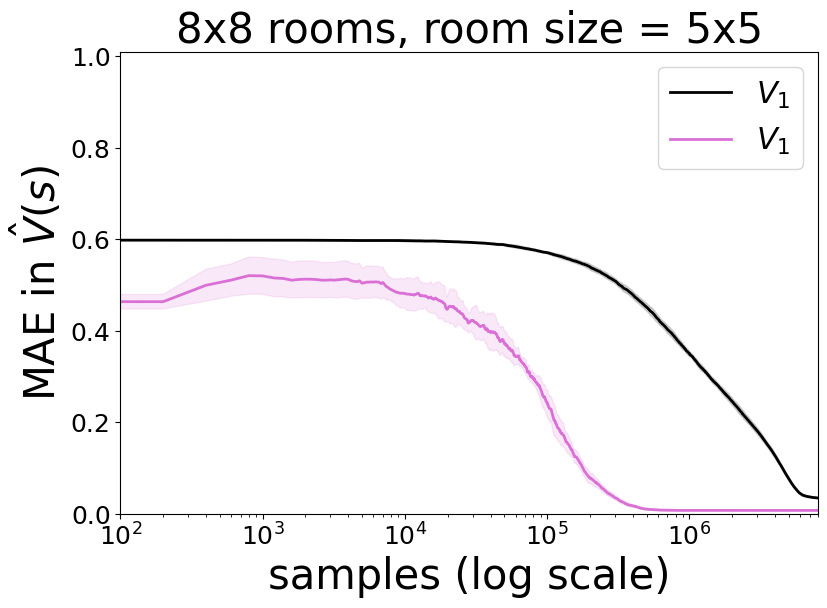

In [50]:
MAX_N_SAMPLES = int(1e6)
X_LIM = 25

# FLAT
df_flat = pd.read_csv(os.path.join(results_dir, "NRoom-v3-log-flat-train:MAE_z.csv"))
flat_mean = df_flat.iloc[:, 1:].mean(axis=1)
flat_std = df_flat.iloc[:, 1:].std(axis=1)
steps = df_flat.step.to_numpy()

# FLAT
df_h = pd.read_csv(os.path.join(results_dir, "NRoom-v3-log-hierarchical-train:MAE_exit_states.csv"))
h_mean = df_h.iloc[:, 1:].to_numpy().mean(axis=1)
h_std = df_h.iloc[:, 1:].to_numpy().std(axis=1)
stepsh = df_h.step.to_numpy()

stepsh = np.append(stepsh, steps[-1])
h_mean = np.append(h_mean, h_mean[-1])
h_std = np.append(h_std, h_std[-1])

fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.set_title(fr'8x8 rooms, room size = 5x5', **csfont)

# VERSION 1
ax.plot(steps, flat_mean, linewidth=2, color='black', label='$V_1$')
ax.fill_between(steps, flat_mean-flat_std, flat_mean+flat_std, color='black', alpha=alpha)
# VERSION 2
ax.plot(stepsh, h_mean , linewidth=2, color='orchid', label='$V_1$')
ax.fill_between(stepsh, h_mean-h_std, h_mean+h_std, color='orchid', alpha=alpha)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

legend = ['$V_1$']

ax.legend(fontsize=22, loc=1)
ax.set_ylim((0, 1.01))
ax.set_xscale("log")
ax.set_xlim((1e2, 8e6))


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.xaxis.offsetText.set_fontsize(18)

ax.set_ylabel('MAE in $\hat V(s)$', **hfont)
ax.set_xlabel('samples (log scale)', **hfont)

plt.savefig('../results/pictures/nrooms_8_8.pdf', bbox_inches='tight', dpi=500)
plt.show()

## Taxi-v1

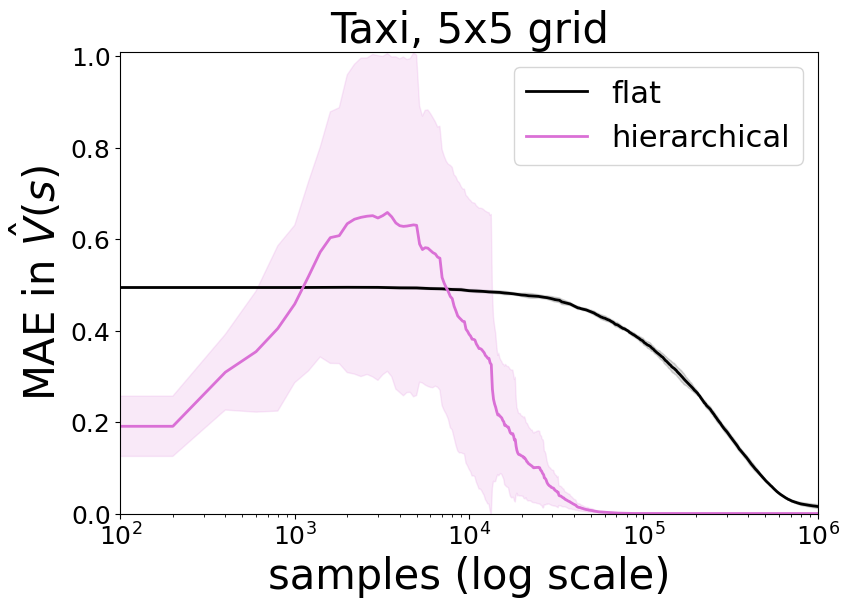

In [19]:
MAX_N_SAMPLES = int(1e6)
X_LIM = 25

# FLAT
df_flat = pd.read_csv(os.path.join(results_dir, "Taxi-v1-log-flat-train:MAE_z.csv"))
flat_mean = df_flat.iloc[:, 1:].mean(axis=1)
flat_std = df_flat.iloc[:, 1:].std(axis=1)
steps = df_flat.step

# FLAT
df_h = pd.read_csv(os.path.join(results_dir, "Taxi-v1-log-hierarchical-train:MAE_exit_states.csv"))
h_mean = df_h.iloc[:, 1:].mean(axis=1)
h_std = df_h.iloc[:, 1:].std(axis=1)
stepsh = df_h.step

fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.set_title(fr'Taxi, 5x5 grid', **csfont)

# VERSION 1
ax.plot(steps, flat_mean, linewidth=2, color='black', label='flat')
ax.fill_between(steps, flat_mean-flat_std, flat_mean+flat_std, color='black', alpha=alpha)
# VERSION 2
ax.plot(stepsh, h_mean , linewidth=2, color='orchid', label='hierarchical')
ax.fill_between(stepsh, h_mean-h_std, h_mean+h_std, color='orchid', alpha=alpha)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax.legend(fontsize=22, loc=1)
ax.set_ylim((0, 1.01))
ax.set_xscale("log")
ax.set_xlim((1e2, 1e6))


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.xaxis.offsetText.set_fontsize(18)

ax.set_ylabel('MAE in $\hat V(s)$', **hfont)
ax.set_xlabel('samples (log scale)', **hfont)

plt.savefig('../results/pictures/taxi_5.pdf', bbox_inches='tight', dpi=500)
plt.show()

## Taxi-v2

11999000.0


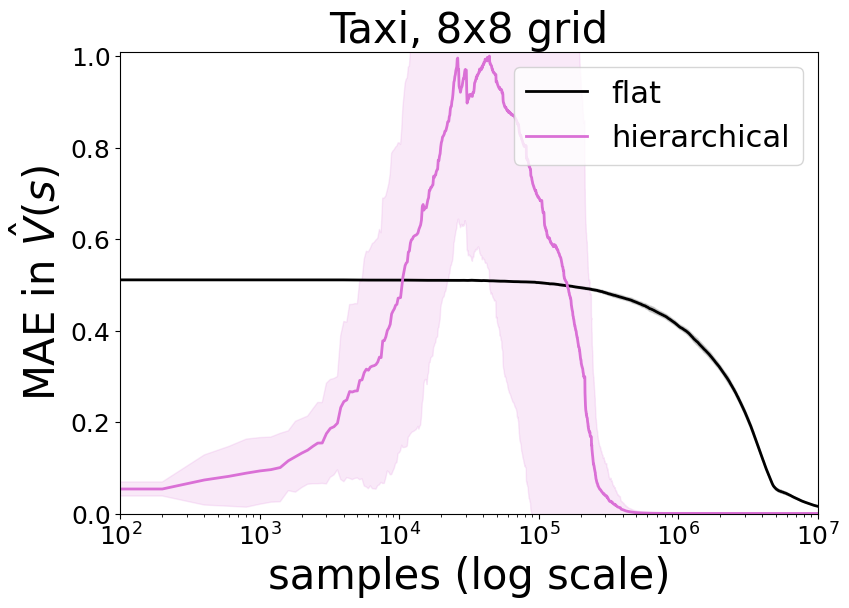

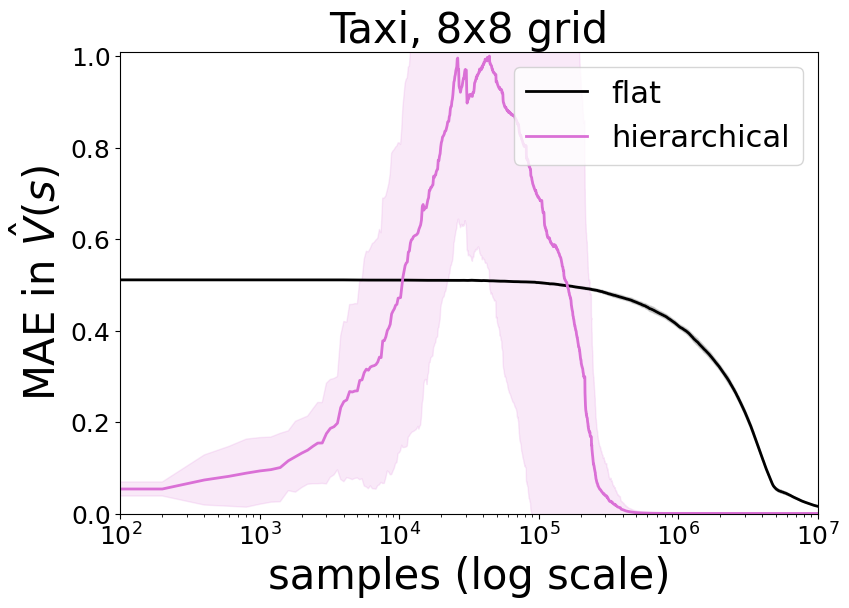

In [51]:
MAX_N_SAMPLES = int(1e6)
X_LIM = 25

# FLAT
df_flat = pd.read_csv(os.path.join(results_dir, "Taxi-v3-log-flat-train:MAE_z.csv"))
flat_mean = df_flat.iloc[:, 1:].to_numpy().mean(axis=1)
flat_std = df_flat.iloc[:, 1:].to_numpy().std(axis=1)
steps = df_flat.step.to_numpy()

print(steps[-1])

# FLAT
df_h = pd.read_csv(os.path.join(results_dir, "Taxi-v3-log-hierarchical-train:MAE_exit_states.csv"))
N = df_h.iloc[:, 1:].mean(axis=1).max()
h_mean = (df_h.iloc[:, 1:].to_numpy()/ N).mean(axis=1)
h_std = (df_h.iloc[:, 1:].to_numpy() / N).std(axis=1)
stepsh = df_h.step.to_numpy()

stepsh = np.append(stepsh, steps[-1])
h_mean = np.append(h_mean, h_mean[-1])
h_std = np.append(h_std, h_std[-1])

fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.set_title(fr'Taxi, 8x8 grid', **csfont)

# VERSION 1
ax.plot(steps, flat_mean, linewidth=2, color='black', label='flat')
ax.fill_between(steps, flat_mean-flat_std, flat_mean+flat_std, color='black', alpha=alpha)
# VERSION 2
ax.plot(stepsh, h_mean , linewidth=2, color='orchid', label='hierarchical')
ax.fill_between(stepsh, h_mean-h_std, h_mean+h_std, color='orchid', alpha=alpha)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

legend = ['$V_1$']

ax.legend(fontsize=22, loc=1)
ax.set_ylim((0, 1.01))
ax.set_xscale("log")
ax.set_xlim((1e2, 10e6))


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.xaxis.offsetText.set_fontsize(18)

ax.set_ylabel('MAE in $\hat V(s)$', **hfont)
ax.set_xlabel('samples (log scale)', **hfont)

plt.savefig('../results/pictures/taxi_8.pdf', bbox_inches='tight', dpi=500)
plt.show()